# AIRLINE DATASET

it is consist of 2 rows -> one is for month in particular year and other is no of passesnnger travelled in that month in thousands

In [1]:
from pandas import read_csv
import numpy as np

In [2]:
# here we are just concern with previous 12 months but not specific months therfore column 0 is useless for us 
df = read_csv('international-airline-passengers.csv',usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
# getting values in float as it return integer values in an array -> use it for converting in desired format.
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int(values.shape[0] * 0.67)
test_size = int(values.shape[0]  - train_size)
print(train_size, test_size)
train = values [0:train_size]
test =  values [train_size:]
# here we have got our data in test train (in an array)

96 48


In [5]:
# lets perform scalling on data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # here each value lies in 0-1 but it may excede 1 in testing data
train = scaler.fit_transform(train)
test = scaler.transform(test)

# here we have got our scalled data -> now

# lets convert into desire format


In [6]:
def create_dataset(data , k):
    dataX,dataY = [],[]
    
    # example -> if we have 100 data and window size is 5 then we have 95 data point as 94-98 is training data and 99 is output
    # starting index is 0
    for i in range(len(data)-k):
        x = data[i:i+k,0]
        y =data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)
    

In [7]:
look_back = 12
trainX , trainY = create_dataset(train,look_back)
testX , testY = create_dataset(test,look_back)
# now we have our data which we need to use while training the model.
trainY.shape

(84,)

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
trainX.shape,testX.shape

((84, 12, 1), (36, 12, 1))

In [9]:
# CREATE OUR MODEL

In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN , Dense , LSTM

G:\GAURANG123\ML\AnacondaPython\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# using default actiavtion fucntion to be tanh
# here we are using SimpleRNN for RNN implementation
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
# look_back,1 => it will use this shape as input_shape to train model
# now we need to change the shape accordining as 
# now we have shape somthing like 84 , 12 -> 84 data points and each points has 12 entries 
# but in RNN -> we need to pass data -> 84 data point -> each of them is a sequence  -> which have length of sequence i.e 12
# each sequence may have multiple feature here we have 1 so we have reshape 84 12 -> 84 12 1

# this is a basic concept behind input and input_size
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam') # refer google or neural network module
model.fit(trainX, trainY , epochs=10,batch_size=1)


# for any query kindly refer video or complete module.

Epoch 1/10
84/84 [==============================] - 4s 43ms/step - loss: 0.0552
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 10/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0067


In [12]:
testPredict = model.predict(testX)
print(testPredict.shape)
# since this data is unscaled -> so lets inverse it
testPredict = scaler.inverse_transform(testPredict).ravel() # ravel() make output to be one dimensional

print(testPredict.shape)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()
print(trainPredict.shape)
trainTrue = scaler.inverse_transform([trainY]).ravel()  
        # => [trainY] -> while fiting we were getting 2d array so need to pass 2D array
testTrue = scaler.inverse_transform([testY]).ravel()


testPredict.shape,testTrue.shape

(36, 1)
(36,)
(84,)


((36,), (36,))

In [13]:
import matplotlib.pyplot as plt

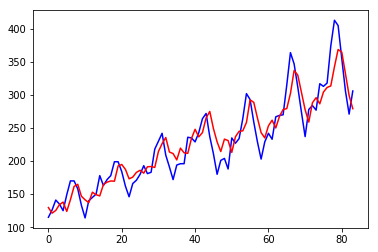

In [14]:
# graph to visualize our prediction on training data
plt.plot(trainTrue,c='b')
plt.plot(trainPredict,c='r')
plt.show()

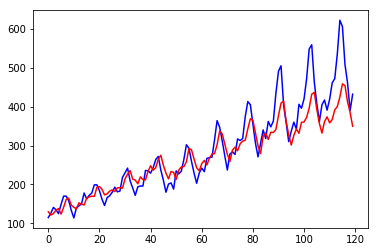

In [15]:
# graph to visualize prediction using RNN on complete data 

combinedPredicted = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='b')
plt.plot(combinedPredicted,c='r')
plt.show()

In [16]:
model = Sequential()
model.add(LSTM(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer = 'adam') # refer google or neural network module
model.fit(trainX, trainY , epochs=10,batch_size=1)



Epoch 1/10
84/84 [==============================] - 3s 42ms/step - loss: 0.1448
Epoch 2/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0366
Epoch 3/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0263
Epoch 4/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0210
Epoch 5/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0168
Epoch 6/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0141
Epoch 7/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0130A: 0s - loss: 0.013
Epoch 8/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0130
Epoch 9/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0132
Epoch 10/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0122


In [17]:
testPredict = model.predict(testX)
print(testPredict.shape)
# since this data is unscaled -> so lets inverse it
testPredict = scaler.inverse_transform(testPredict).ravel() # ravel() make output to be one dimensional

print(testPredict.shape)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()
print(trainPredict.shape)
trainTrue = scaler.inverse_transform([trainY]).ravel()  
        # => [trainY] -> while fiting we were getting 2d array so need to pass 2D array
testTrue = scaler.inverse_transform([testY]).ravel()


testPredict.shape,testTrue.shape

(36, 1)
(36,)
(84,)


((36,), (36,))

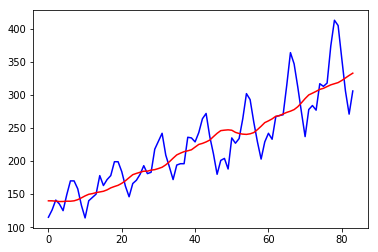

In [18]:
# graph to visualize our prediction on training data
plt.plot(trainTrue,c='b')
plt.plot(trainPredict,c='r')
plt.show()

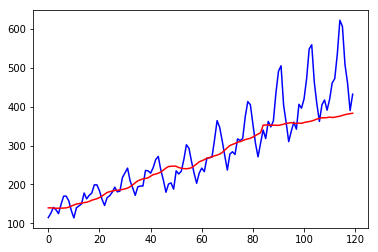

In [19]:
# graph to visualize prediction using RNN on complete data 

combinedPredicted = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='b')
plt.plot(combinedPredicted,c='r')
plt.show()